In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [59]:
df[["VPD", "VPD_f"]] + [0, 100]

,VPD,VPD_f
Date Time,,
2020-05-01 00:00:00,4.174817,104.174817
2020-05-01 03:00:00,2.422533,102.422533
2020-05-01 06:00:00,3.122900,103.171050
2020-05-01 09:00:00,9.794900,109.794900
2020-05-01 12:00:00,12.665333,112.665333
...,...,...
2021-09-01 09:00:00,9.091817,109.091817
2021-09-01 12:00:00,10.297117,110.297117
2021-09-01 15:00:00,3.174217,103.174217


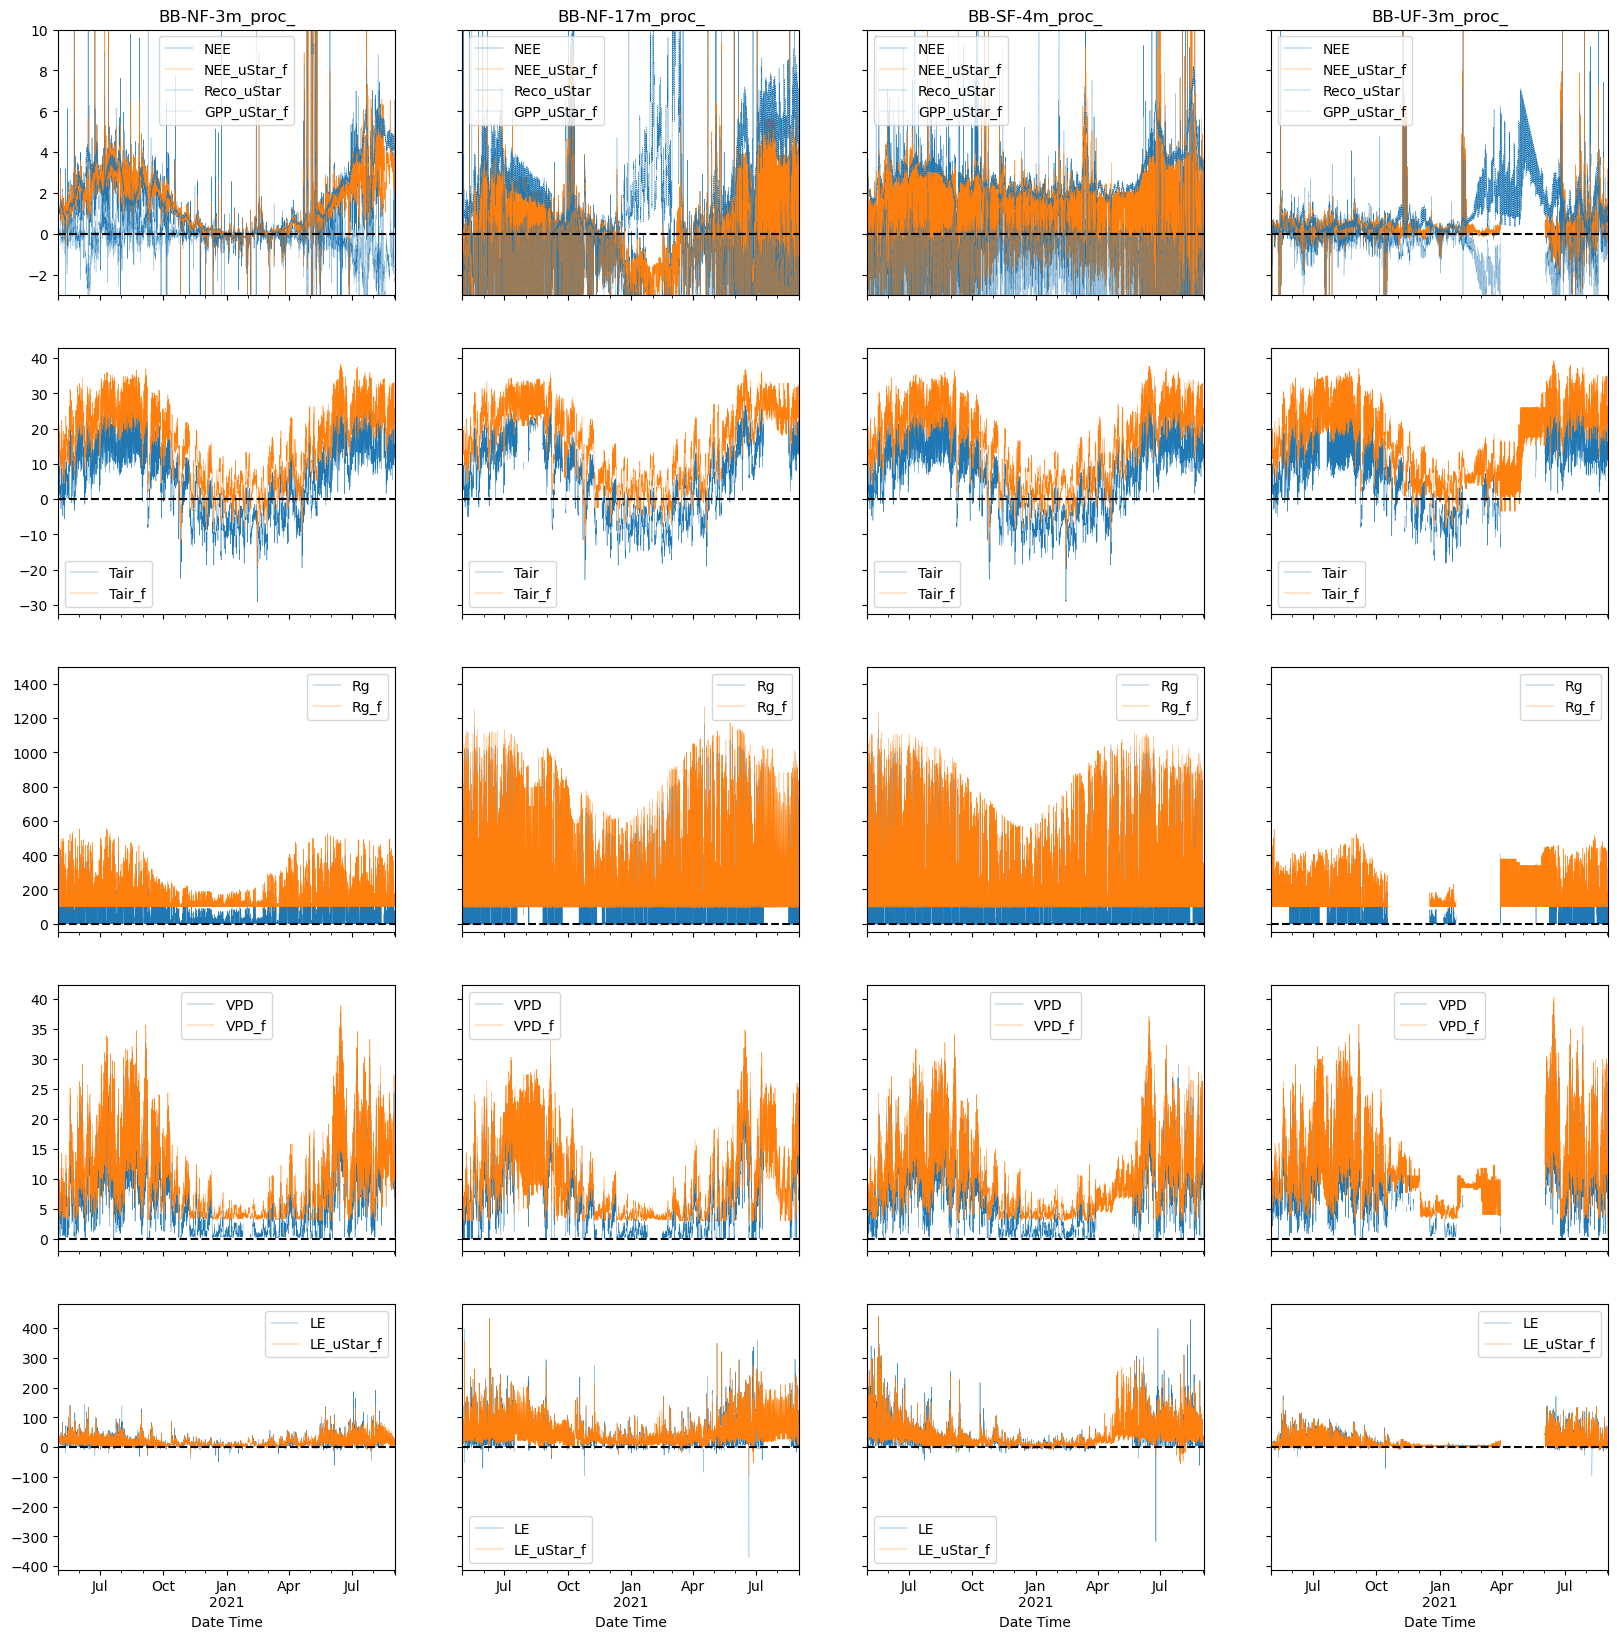

In [62]:
flux_dir = Path('/project/bbtrees/afox18/EddyProConfigEditor/workflows/Postproc_all')
files = [flux_dir / 'BB-NF-3m_proc_.tsv', flux_dir / 'BB-NF-17m_proc_.tsv', flux_dir / 'BB-SF-4m_proc_.tsv', flux_dir / 'BB-UF-3m_proc_.tsv']
fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex="col", sharey="row")

lw=0.3
for i in range(4):
    df = (
        pd.read_csv(files[i], sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
        .set_index("Date Time")
        .loc["2020-05-01":"2021-09-01"]
        .groupby(pd.Grouper(freq="3h")).mean()
        # .rolling("3d").mean()
    )    
    
    df[["NEE", "NEE_uStar_f"]].plot(ax=axs[0, i], style=["C0-", "C1-"], lw=lw)#, ylim=(-50, 500))
    df[["Reco_uStar"]].plot(ax=axs[0, i], style=["C0--", "C1--"], lw=lw)
    (-df[["GPP_uStar_f"]]).plot(ax=axs[0, i], ylim=(-3, 10), style=["C0:", "C1:"], lw=lw)
    axs[0, i].hlines(0, *axs[0, i].get_xlim(), "k", "--")
    
    (df[["Tair", "Tair_f"]] + [0, 10]).plot(ax=axs[1, i], lw=lw)
    axs[1, i].hlines(0, *axs[0, i].get_xlim(), "k", "--")
    
    (df[["Rg", "Rg_f"]] + [0, 100]).plot(ax=axs[2, i], ylim=(-50, 1500), lw=lw)
    axs[2, i].hlines(0, *axs[0, i].get_xlim(), "k", "--")
    
    (df[["VPD", "VPD_f"]] + [0, 3]).plot(ax=axs[3, i], lw=lw)#, ylim=(-50, 500))
    axs[3, i].hlines(0, *axs[0, i].get_xlim(), "k", "--")
    
    df[["LE", "LE_uStar_f"]].plot(ax=axs[4, i], lw=lw)#, ylim=(-50, 500))
    axs[4, i].hlines(0, *axs[0, i].get_xlim(), "k", "--")

    axs[0, i].set_title(files[i].stem)
    


In [2]:
NF_soil_et = pd.read_csv("soil-water-budget/NF_data.csv", parse_dates=["TIMESTAMP"]).set_index("TIMESTAMP")
NF_5cm = NF_soil_et.filter(regex="^VWC_[ABCD]-5$").mean(1)
NF_10cm = NF_soil_et.filter(regex="^VWC_[ABCD]-10$").mean(1)
NF_15cm = NF_soil_et.filter(regex="^VWC_[ABCD]-15$").mean(1)
NF_30cm = NF_soil_et.filter(regex="^VWC_[ABCD]-30$").mean(1)
NF_50cm = NF_soil_et.filter(regex="^VWC_[ABCD]-50$").mean(1)

UF_soil_et = pd.read_csv("soil-water-budget/UF_data.csv", parse_dates=["TIMESTAMP"]).set_index("TIMESTAMP")
UF_5cm = UF_soil_et.filter(regex="^VWC_[ABCD]-5$").mean(1)
UF_10cm = UF_soil_et.filter(regex="^VWC_[ABCD]-10$").mean(1)
UF_15cm = UF_soil_et.filter(regex="^VWC_[ABCD]-15$").mean(1)
UF_30cm = UF_soil_et.filter(regex="^VWC_[ABCD]-30$").mean(1)
UF_50cm = UF_soil_et.filter(regex="^VWC_[ABCD]-50$").mean(1)

SF_soil_et = pd.read_csv("soil-water-budget/SF_data.csv", parse_dates=["TIMESTAMP"]).set_index("TIMESTAMP")
SF_5cm = SF_soil_et.filter(regex="^VWC_[ABCD]-5$").mean(1)
SF_10cm = SF_soil_et.filter(regex="^VWC_[ABCD]-10$").mean(1)
SF_15cm = SF_soil_et.filter(regex="^VWC_[ABCD]-15$").mean(1)
SF_30cm = SF_soil_et.filter(regex="^VWC_[ABCD]-30$").mean(1)
SF_50cm = SF_soil_et.filter(regex="^VWC_[ABCD]-50$").mean(1)

NF_ET = NF_soil_et["ET"]
SF_ET = SF_soil_et["ET"]
UF_ET = UF_soil_et["ET"]

flux_dir = Path('/project/bbtrees/afox18/EddyProConfigEditor/workflows/Postproc_all')
flux_sf = (
    pd.read_csv(flux_dir / 'BB-SF-4m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    # [["Date Time", "NEE_uStar_f"]]
    .rename(columns={"Date Time":"TIMESTAMP", "NEE_uStar_f":"NEE_f"})
)
SF_other = flux_sf[["TIMESTAMP", "NEE_f", "Tair", "VPD"]].sort_values("TIMESTAMP").set_index("TIMESTAMP")

flux_nf = (
    pd.read_csv(flux_dir / 'BB-NF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    # [["Date Time", "NEE_uStar_f"]]
    .rename(columns={"Date Time":"TIMESTAMP", "NEE_uStar_f":"NEE_f"})
)
NF_other = flux_nf[["TIMESTAMP", "NEE_f", "Tair", "VPD"]].sort_values("TIMESTAMP").set_index("TIMESTAMP")

flux_uf = (
    pd.read_csv(flux_dir / 'BB-UF-3m_proc_.tsv', sep="\t", skiprows=[1], na_values=-9999, parse_dates=["Date Time"])
    # [["Date Time", "NEE_uStar_f"]]
    .rename(columns={"Date Time":"TIMESTAMP", "NEE_uStar_f":"NEE_f"})
)
UF_other = flux_uf[["TIMESTAMP", "NEE_f", "Tair", "VPD"]].sort_values("TIMESTAMP").set_index("TIMESTAMP")



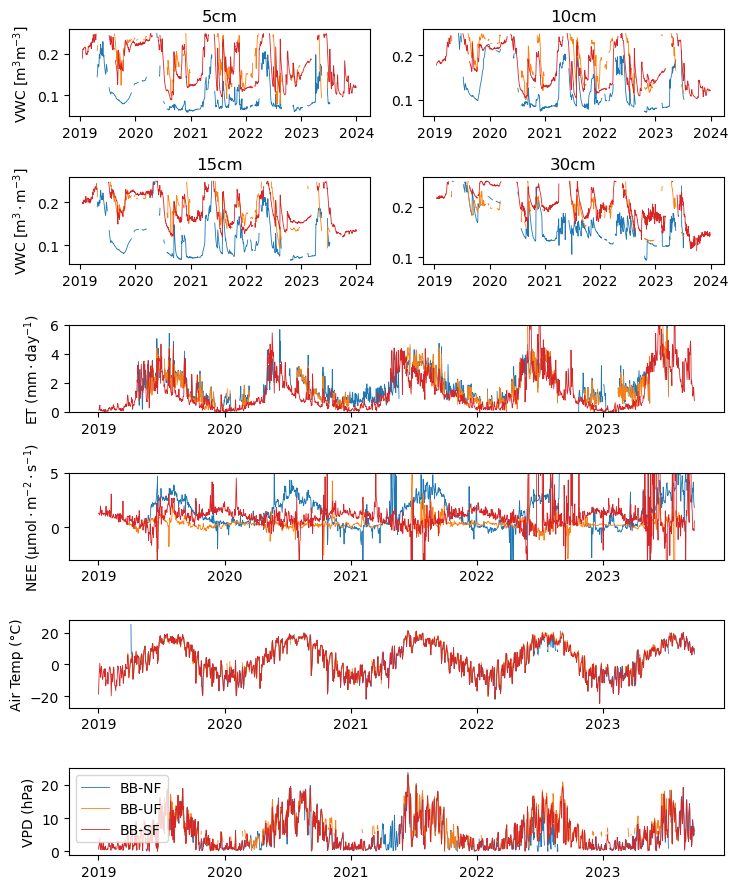

In [63]:
fig = plt.figure(figsize=(7.5, 9))

rows = 6
lw = 0.6
#### VWC ####
fig.add_subplot(rows, 2, 1)
plt.plot(NF_5cm.groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_5cm.groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_5cm.groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.title("5cm")
plt.ylabel("VWC [$\mathrm{m^3 m^{-3}}$]")

fig.add_subplot(rows, 2, 2)
plt.plot(NF_10cm.groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_10cm.groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_10cm.groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.title("10cm")

fig.add_subplot(rows, 2, 3)
plt.plot(NF_15cm.groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_15cm.groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_15cm.groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.title("15cm")
plt.ylabel("VWC [$\mathrm{m^3 \cdot m^{-3}}$]")

fig.add_subplot(rows, 2, 4)
plt.plot(NF_30cm.groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_30cm.groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_30cm.groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.title("30cm")

#### ET ####
fig.add_subplot(rows, 1, 3)
plt.plot(NF_ET.groupby(pd.Grouper(freq="1d")).mean()*1000, color="C0", lw=lw)
plt.plot(UF_ET.groupby(pd.Grouper(freq="1d")).mean()*1000, color="C1", lw=lw)
plt.plot(SF_ET.groupby(pd.Grouper(freq="1d")).mean()*1000, color="C3", lw=lw)
plt.ylim(0, 6)
plt.ylabel("ET ($\mathrm{mm \cdot day^{-1}}$)")

#### NEE ####
fig.add_subplot(rows, 1, 4)
plt.plot(NF_other["NEE_f"].groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_other["NEE_f"].groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_other["NEE_f"].groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.ylim(-3, 5)
plt.ylabel("NEE ($\mathrm{\mu mol \cdot m^{-2} \cdot s^{-1}}$)")

#### TA ####
fig.add_subplot(rows, 1, 5)
plt.plot(NF_other["Tair"].groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_other["Tair"].groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_other["Tair"].groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.ylabel("Air Temp (°C)")

#### VPD ####
fig.add_subplot(rows, 1, 6)
plt.plot(NF_other["VPD"].groupby(pd.Grouper(freq="1d")).mean(), color="C0", lw=lw)
plt.plot(UF_other["VPD"].groupby(pd.Grouper(freq="1d")).mean(), color="C1", lw=lw)
plt.plot(SF_other["VPD"].groupby(pd.Grouper(freq="1d")).mean(), color="C3", lw=lw)
plt.ylabel("VPD (hPa)")
plt.legend(["BB-NF", "BB-UF", "BB-SF"])

plt.tight_layout(h_pad=1.2)

plt.savefig("timeseries.png")